$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# Práctica nº 5. Matemáticas I de Ingeniería Informática

En este práctica haremos primitivas de funciones (integrales indefinidas) e integrales definidas con algunas de sus aplicaciones geométricas, como son el cálculo de áreas de figuras planas y longitudes de curvas. La principal orden nueva que usaremos es integral (o integrate).

## Primitivas

Una primitiva de una función $f(x)$ es otra función $g(x)$ tal que $g'(x)=f(x)$. Si $g(x)$ es una primitiva y $C$ es una constante, $g(x)+C$ también es primitiva. Se escribe $\int f(x)\,dx=g(x)+C$. Hay varias reglas o recetas para el cálculo de primitivas y Sage contiene la mayoría de ellas. Para calcular una primitiva, intentaremos integral(f(x),x) o integrate(f(x),x). Uno de los objetivos de este curso es que el alumno aprenda a hallar primitivas utilizando distintos métodos (descomposición en fracciones simples y método de Hermite para funciones racionales, integración por partes, cambio de variable...), pero podemos usar Sage para comprobar los resultados.

**Ejemplo 1.** Comprobar que Sage sabe hallar primitivas de las funciones $f(x)=x\cos(x^2)$ y $\displaystyle g(x)=2\frac{1+x^2}{1+x^4}$ y comprobar, derivando, que no se ha equivocado.

In [1]:
reset()
integral(x*cos(x^2),x) # Sage omite la constante

1/2*sin(x^2)

In [2]:
diff(1/2*sin(x^2),x) # comprobamos el resultado

x*cos(x^2)

In [3]:
g(x)=2*(1+x^2)/(1+x^4)
integrate(g(x),x).show()

sqrt(2)*arctan(1/2*sqrt(2)*(2*x + sqrt(2))) + sqrt(2)*arctan(1/2*sqrt(2)*(2*x - sqrt(2)))

In [4]:
h(x)=integrate(g(x),x)
diff(h(x),x).show() # no vemos directamente que es g(x)

4/((2*x + sqrt(2))^2 + 2) + 4/((2*x - sqrt(2))^2 + 2)

In [5]:
(g(x)-diff(h(x),x)).full_simplify() # ahora sí

0

El teorema fundamental del cálculo demuestra que toda función continua en un intervalo tiene primitiva. Pero no siempre -de hecho muy pocas veces- esta primitiva es expresable en términos de funciones elementales (llamemos a esto primitiva elemental). Por ejemplo, una función de apariencia tan sencilla como $f(x)=\sqrt{x}e^x$ no tiene primitiva elemental. Sage da una respuesta en términos de otras funciones no elementales (como la función $\Gamma$, la función $\operatorname{erf}$ y otras, definidas precisamente por medio integrales, que no estudiaremos aquí). Veamos la siguiente respuesta, donde aparece la función $\operatorname{erf}$ :

In [6]:
integrate(sqrt(x)*e^x,x)

1/2*I*sqrt(pi)*erf(I*sqrt(x)) + sqrt(x)*e^x

Para otras funciones que tampoco tienen primitiva elemental (o que es muy difícil encontrarla), Sage no dará respuesta o dará -después de un rato de espera- una respuesta obviamente equivocada. Véase, por ejemplo, el caso de $\displaystyle\int \sin^{1/3} x\,dx$ :

In [7]:
integrate(sin(x)^(1/3),x)

integrate(sin(x)^(1/3), x)

## **Integrales definidas**

La integral definida de una función $f$ en el intervalo $[a,b]$ es un valor que se escribe $\int_a^b f(x)\, dx$ y se define por procedimientos de paso al límite de sumas (asociadas a particiones del intervalo) que se verán en las clases teóricas y que no repetiremos aquí. Cuando conocemos una primitiva de la función $f(x)$ (es decir, una $F(x)$ tal que $F'(x)=f(x)$), la regla de Barrow da la forma más sencilla de calcular una integral definida: $\displaystyle \int_a^b f(x)\,dx=F(b)-F(a)$. Pero, aunque no conozcamos una primitiva, hay otras maneras de proceder para calcular integrales definidas. Recordamos también que una de las principales aplicaciones de la integral definida es el cálculo de áreas. Sobre todo: si $f(x)\geq 0$, $\int_a^b f(x)\, dx$ representa el área del recinto comprendido entre el eje $OX$, la curva $y=f(x)$, y las rectas verticales de abscisas $x=a$ y $x=b$. Con este breve preámbulo desarrollamos unos ejemplos:

**Ejemplo 2.** Calcular la integral $\displaystyle \int_0^1 \frac{1}{e^x+1}dx$. Por otro lado, hallar una primitiva y comprobar que se cumple la regla de Barrow.

In [8]:
integral(1/(e^x +1),x,0,1)

log(2) - log(e + 1) + 1

In [9]:
F(x)=integral(1/(e^x +1),x)
F(x).show()
F(1)-F(0)

x - log(e^x + 1)

log(2) - log(e + 1) + 1

**Ejemplo 3.** Comprobar que $\displaystyle \int_{-1}^1\frac{x^3-x}{(2+\sin^2 x)}\,dx=0$. El resultado es fácil de probar porque la función es impar. Sin embargo, comprobar que Sage no sabe calcular una primitiva. Luego aquí tenemos un ejemplo simple de que hay otras formas de hacer integrales definidas, aparte de la regla de Barrow.

In [10]:
reset()
integral((x^3-x)/(2+sin(x)^2),x,-1,1)

0

In [11]:
integral((x^3-x)/(2+sin(x)^2),x)

integrate((x + 1)*(x - 1)*x/(sin(x)^2 + 2), x)

## **Aproximación numérica**

Muchas integrales definidas no las sabremos calcular, pero acudiendo a la definición (límite de sumas), para cualquier función podremos dar un valor aproximado de la integral. Sage lo sabe hacer con la orden numerical\_integral que, aparte de devolver el valor aproximado, también devuelve una cota del error cometido.

**Ejemplo 4.** Dar un valor aproximado de $\displaystyle \int_2^3\frac{1+\cos x}{\log x +\sqrt{1+\sin x}}\,dx$.

In [ ]:
reset()
f(x)=(1+cos(x))/(log(x)+sqrt(1+sin(x)))
integral(f(x),x,2,3) # no la sabe hacer

In [2]:
reset()
f(x)=(1+cos(x))/(log(x)+sqrt(1+sin(x)))
numerical_integral(f(x),2,3)

(0.10836134248944476, 1.2030525741107386e-15)

El valor de la integral es ese número 0,108... con un error que vemos que es menor que $1.2...\times 10^{-15}$. Lo que quiere decir que hemos calculado la integral con $14$ cifras decimales exactas. Hay más aspectos y órdenes en torno a la aproximación de integrales que usa Sage, pero no los trataremos aquí. La respuesta de los dos datos es similar a una lista (no exactamente pues va entre paréntesis y no corchetes). Ya sabemos entonces cómo sacar el valor de la integral (primer dato de la lista):

In [19]:
numerical_integral(f(x),2,3)[0]

0.10836134248944476

## Dibujo de algunos recintos

Antes de entrar en el cálculo de áreas por medio de integrales, veamos unos rudimentos sobre cómo podemos dibujar recintos en el plano, limitados por gráficas de funciones. Aprenderemos con el siguiente ejemplo. Nos proponemos dibujar el recinto acotado limitado por las parábolas $y = x^2 +3x−3$ e $y = 2x+5 −2x^2$. Hacemos un primer dibujo que nos aclara de qué recinto estamos hablando:

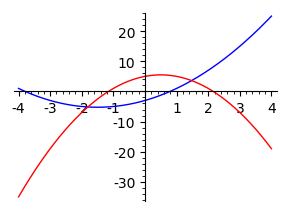

In [3]:
reset()
f(x)=x^2+3*x-3
g(x)=2*x+5-2*x^2
A=plot(f(x),x,-4,4)
B=plot(g(x),x,-4,4,color='red')
(A+B).show(figsize=3)

Ahora, resolveremos los puntos de corte para limitarnos a esas dos abscisas y coloreamos además el recinto:

In [6]:
solve(f(x)==g(x),x)

[x == -1/6*sqrt(97) - 1/6, x == 1/6*sqrt(97) - 1/6]

In [5]:
a=-1/6*sqrt(97) - 1/6
b=1/6*sqrt(97) - 1/6

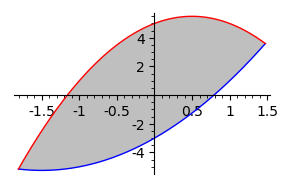

In [7]:
A=plot(f(x),(x,a,b),fill=g(x))
B=plot(g(x),(x,a,b),color='red')
(A+B).show(figsize=3)

Observemos que la opción básica es fill=g(x) que hemos metido dentro del primer plot. Con esta orden decimos que coloree, para cada abscisa x entre a y b, las líneas que van desde f(x) hasta g(x). Observemos el resultado si nos salimos de a y b (ponemos además color de relleno amarillo):

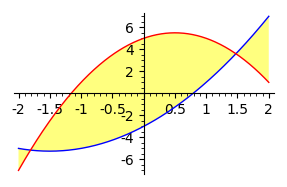

In [8]:
A=plot(f(x),(x,-2,2),fill=g(x),fillcolor='yellow')
B=plot(g(x),(x,-2,2),color='red')
(A+B).show(figsize=3)

## Areas de regiones planas

Si $f(x)\geq g(x)$ en $[a,b]$, el área de la regíon limitada por ambas curvas entre las rectas verticales $x=a$ y $x=b$ está dada por la integral definida $\displaystyle \int_a^b(f(x)-g(x))\,dx$. Si no es siempre $f(x)\geq g(x)$, en los intervalos donde ocurra al reves, habrá que intercambiar los papeles de $f(x)$ y $g(x)$.

**Nota.** Independientemente de si $f(x)$ es mayor o menor que $g(x)$, el área es siempre $A=\displaystyle \int_a^b|f(x)-g(x)|\,dx$. Como vimos en desigualdades, Sage tiene algunos problemas al tratar valores absolutos. En el cálculo de integrales con valores absolutos, Sage tenía problemas en versiones anteriores. Aunque estos problemas se han ido solucionando, por si acaso, en los ejemplos que siguen dividimos las integrales en trozos dependiendo del signo de $f(x)-g(x)$.

**Ejemplo 5.** Calcular el área comprendida entre $y=\sin x-\cos x$, el eje OX y las rectas $x=0$, $x=\pi$.

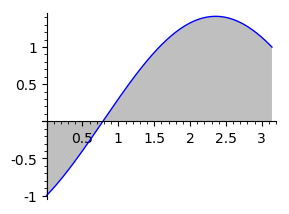

In [2]:
reset()
f(x)=sin(x)-cos(x)
plot(f(x),x,0,pi,fill=0,figsize=3)

Tendremos que hallar el punto de corte $x_0$ y el área será $\displaystyle \int_0^{x_0} (-f(x))\,dx+\int_{x_0}^\pi f(x)\,dx$ :

In [3]:
solve(f(x)==0,x,to_poly_solve=true) # x0=pi/4

[x == 1/4*pi + pi*z1]

In [4]:
AREA=integral(-f(x),x,0,pi/4)+integral(f(x),x,pi/4,pi)
AREA.show()

2*sqrt(2)

Comprobamos que en este caso, con los valores absolutos sí la sabe hacer:

In [5]:
integral(abs(f(x)),x,0,pi)

2*sqrt(2)

**Ejemplo 6.** Calcular el área comprendida entre $y=2x+5$, $y=x^2+2$ y las rectas $x=0$, $x=6$.

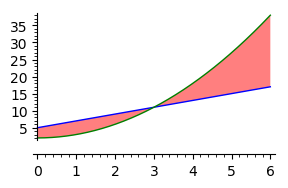

In [7]:
reset()
f(x)=2*x+5
g(x)=x^2+2
A=plot(f(x),0,6,color='blue')
B=plot(g(x),0,6,color='green',fill=f(x),fillcolor='red')
(A+B).show(figsize=3)

In [11]:
solve(f(x)-g(x)==0,x) # confirmamos el corte en x=3

[x == 3, x == -1]

In [12]:
integral(f(x)-g(x),x,0,3)+integral(g(x)-f(x),x,3,6)

36

## Longitudes de curvas planas

Sea $f(x)$ una función definida en $[a,b]$. La longitud del arco de curva definido por la gráfica de esa función es $\displaystyle L=\int_a^b \sqrt{1+f'(x)^2}\, dx.$

**Ejemplo 7.** Calcular la longitud del lazo acotado que forma la curva $9y^2=x(x-3)^2$.

Para comprender de qué curva se trata tratemos de dibujarla: Los puntos $(x,y)$ que cumplen esa igualdad son $y=\frac{1}{3}\sqrt{x(x-3)^2}$ e $y=-\frac{1}{3}\sqrt{x(x-3)^2}$. Para que la raíz esté definida, debe ser $x>0$. Hacemos un primer dibujo:

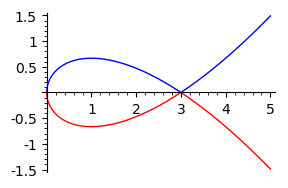

In [9]:
reset()
f(x)=1/3*sqrt(x*(x-3)^2)
g(x)=-1/3*sqrt(x*(x-3)^2)
A=plot(f(x),x,0,5,color='blue')
B=plot(g(x),x,0,5,color='red')
(A+B).show(figsize=3)

Viendo el dibujo, se comprende el enunciado: es la longitud de los dos trozos (el de $f(x)$ y el de $g(x)$) entre $x=0$ y $x=3$. Por simetría, es dos veces la longitud del primero:

In [10]:
h(x)=sqrt(1+diff(f(x),x)^2)
2*integrate(h(x),x,0,3)

4*sqrt(3)

## Integrales impropias

La integral definida tiene sentido, en principio, para intervalos acotados y funciones acotadas en $[a,b]$. La definición se extiende a casos en los que el intervalo no es acotado o la función no es acotada. Ponemos aquí dos casos particulares: por ejemplo, si $f$ no es acotada en $a$, pero sí lo es en $[a+\delta,b]$, se define $\displaystyle \int_a^b f(x)\,dx =\lim_{\delta\to 0^+} \int_{a+\delta}^b f(x)\,dx$. O si $f$ es acotada en $[a,R]$ (para cualquier $R>a$) se define $\displaystyle \int_a^{+\infty} f(x)\,dx =\lim_{R\to\infty}\int_{a}^R f(x)\,dx$. A esta clase de integrales las llamamos integrales impropias; por supuesto, los límites pueden existir, ser $+\infty$ o $-\infty$, o no existir, y entonces se dice que la correspondiente integral impropia es convergente, divergente u oscilante (este último caso solo puede darse con funciones f(x) que cambian de signo). Otras integrales impropias (no acotación en $b$, integral en $(-\infty,b]$, etc., se definen de forma análoga).

**Ejemplo 8.** Calcular $\displaystyle \int_0^1\frac{dx}{\sqrt{x}}\,dx$.

Esta integral es impropia pues $\displaystyle f(x)=\frac1{\sqrt{x}}$ no está acotada en $0$. Primero la calculamos por la definición, pero luego vemos que Sage no tiene problema (en este y en otros muchos ejemplos) en hacerlo directamente con la orden integral.

In [11]:
f(x)=1/sqrt(x)
var('d')
limit(integral(f(x),x,d,1),d=0,dir='+')

ValueError: Computation failed since Maxima requested additional constraints; using the 'assume' command before evaluation *may* help (example of legal syntax is 'assume(d-1>0)', see `assume?` for more details)
Is d-1 positive, negative or zero?

In [12]:
integral(f(x),x,0,1)

2

Geométricamente, podemos decir que es el área del recinto *no acotado* que vemos en la siguiente figura:

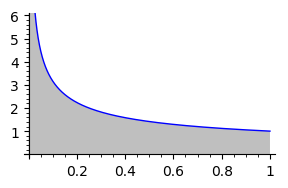

In [13]:
plot(f(x),x,0,1,fill=0,ymax=6,figsize=3)

**Ejemplo 9.** Calcular $\displaystyle \int_0^{+\infty}\frac{dx}{1+x^2}$ (o, equivalentemente, calcular el área del recinto no acotado, limitado por $y=\displaystyle \frac{1}{1+x^2}$, el eje OX y la recta $x=0$).

In [14]:
reset()
f(x)=1/(1+x^2)
var('R')
assume(R>0)
limit(integral(f(x),x,0,R),R=oo) # por la definición

1/2*pi

Vemos a continuación porque hemos tenido que indicar que $R>0$ :

In [15]:
reset()
f(x)=1/(1+x^2)
var('R')
limit(integral(f(x),x,0,R),R=oo) # por la definición

ValueError: Computation failed since Maxima requested additional constraints; using the 'assume' command before evaluation *may* help (example of legal syntax is 'assume(R>0)', see `assume?` for more details)
Is R positive, negative or zero?

No obstante, Sage sabe hacer la integral impropia directamente:

In [16]:
integral(f(x),x,0,oo)

1/2*pi

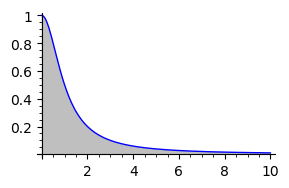

In [17]:
plot(f(x),x,0,10,fill=0,figsize=3)